In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotly.express as px
import sklearn as sk
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

from pandas.plotting import scatter_matrix
pd.set_option('display.max_columns', None)

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



In [2]:
drugs = pd.read_excel('drug_consumption.xls')

In [3]:
drugs.columns = drugs.columns.str.lower()

In [4]:
drugs.drop(labels='id', inplace=True, axis=1)

In [5]:
drugs.drop(drugs[drugs['semer'] != 'CL0'].index, inplace = True)

In [6]:
drugs = drugs.replace(['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'],[0,0,0,0,1,1,1])

In [7]:
drugs.drop(labels= ['semer','caff','choc', 'nicotine', 'alcohol'], axis=1, inplace=True)

In [9]:
drugs.head()

,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,impulsive,ss,amphet,amyl,benzos,cannabis,coke,crack,ecstasy,heroin,ketamine,legalh,lsd,meth,shrooms,vsa
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
drugs['addict']= drugs['amphet']+ drugs['amyl'] + drugs['benzos'] +  drugs['cannabis'] + drugs['coke'] + drugs['crack'] + drugs['ecstasy'] + drugs['heroin'] + drugs['ketamine'] + drugs['legalh'] + drugs['lsd'] + drugs['meth'] + drugs['shrooms'] + drugs['vsa'] 



In [45]:
drugs['partydrugs'] = drugs['amphet'] + drugs['amyl'] + drugs['coke'] + drugs['ecstasy']

In [47]:
drugs['partydrugs_binary'] = drugs.partydrugs.replace([2,3,4,5,6,7,8,9,10],[1,1,1,1,1,1,1,1,1])

In [48]:
drugs['addict_binary'] = drugs.addict.replace([2,3,4,5,6,7,8,9,10,11],[1,1,1,1,1,1,1,1,1,1])

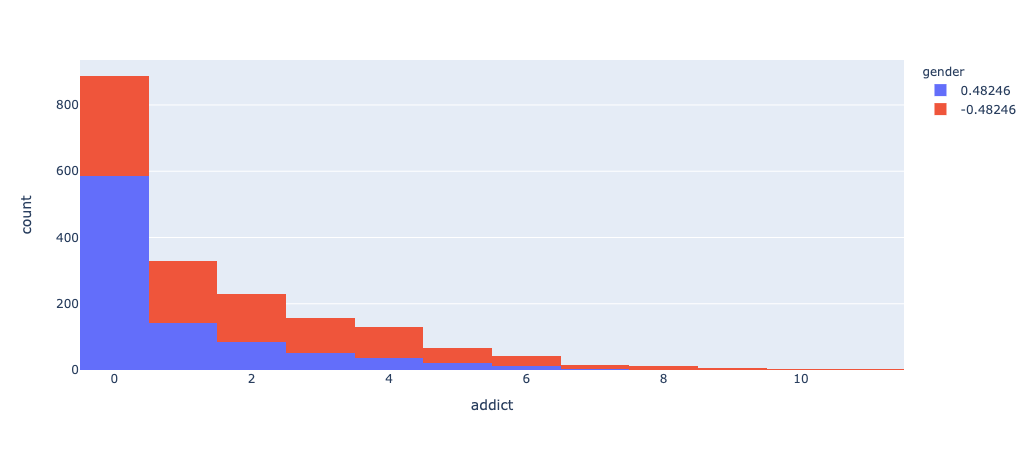

In [14]:
addict_hist = px.histogram(drugs, x = "addict", color='gender')
addict_hist.show()

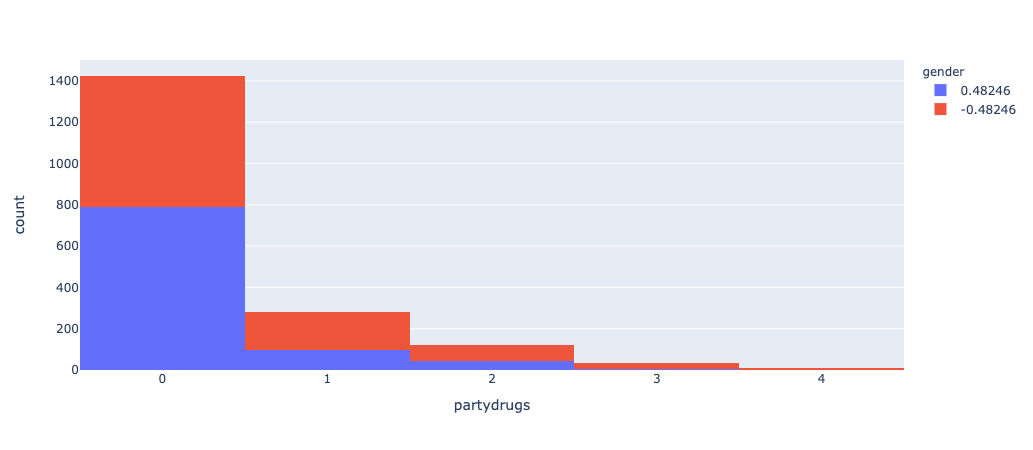

In [50]:
partydrugs_hist = px.histogram(drugs, x = "partydrugs", color='gender')
partydrugs_hist.show()

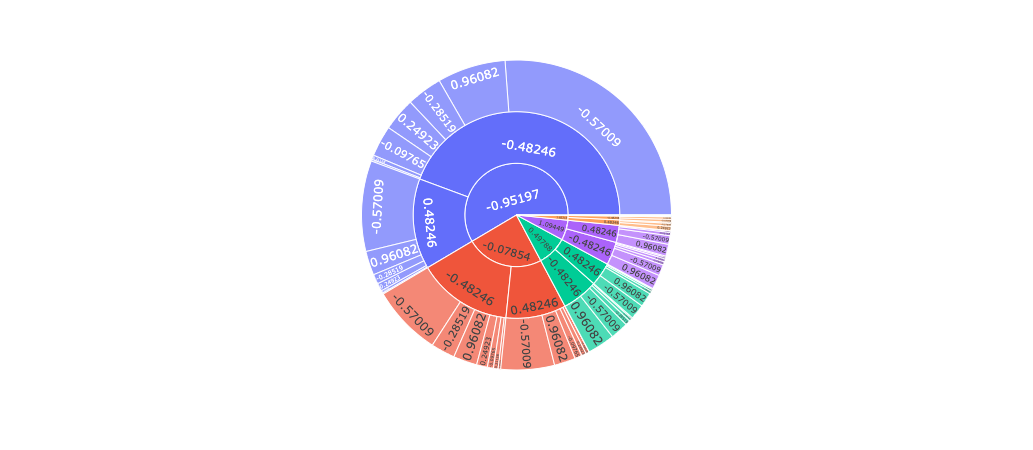

In [15]:
fig_sunburst = px.sunburst(drugs, path=['age', 'gender', 'country'], values='addict')
fig_sunburst.show()

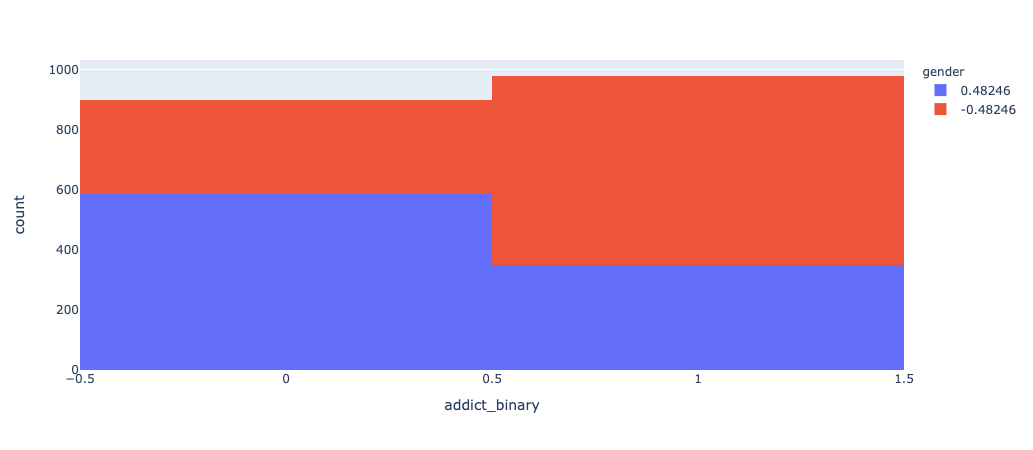

In [12]:
addict_hist = px.histogram(drugs, x = "addict_binary", color='gender')
addict_hist.show()

In [18]:
X = drugs[['age', 'gender', 'education', 'country', 'ethnicity', 'nscore','escore', 'oscore', 'ascore', 'cscore', 'impulsive', 'ss']]
y= drugs['addict_binary']

In [19]:
print(X.shape)
print(y.shape)

(1877, 12)
(1877,)


In [20]:
RSEED=420

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RSEED)

In [22]:
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

In [23]:
gnb = GaussianNB()

In [24]:
y_train_pred_gnb = cross_val_predict(gnb,X_train, y_train) 

In [25]:
print(classification_report(y_train, y_train_pred_gnb))
print(confusion_matrix(y_train, y_train_pred_gnb))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       631
           1       0.83      0.81      0.82       682

    accuracy                           0.81      1313
   macro avg       0.81      0.81      0.81      1313
weighted avg       0.81      0.81      0.81      1313

[[519 112]
 [132 550]]


In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dtc = DecisionTreeClassifier()

In [28]:
y_train_pred_dtc = cross_val_predict(dtc,X_train, y_train) 

In [29]:
print(classification_report(y_train, y_train_pred_dtc))
print(confusion_matrix(y_train, y_train_pred_dtc))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       631
           1       0.74      0.76      0.75       682

    accuracy                           0.74      1313
   macro avg       0.74      0.74      0.74      1313
weighted avg       0.74      0.74      0.74      1313

[[447 184]
 [162 520]]


In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logreg = LogisticRegression()

In [32]:
y_train_pred_logreg = cross_val_predict(logreg,X_train, y_train) 

In [33]:
print(classification_report(y_train, y_train_pred_logreg))
print(confusion_matrix(y_train, y_train_pred_logreg))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       631
           1       0.85      0.80      0.82       682

    accuracy                           0.82      1313
   macro avg       0.82      0.82      0.82      1313
weighted avg       0.82      0.82      0.82      1313

[[533  98]
 [138 544]]


In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier()

In [36]:
y_train_pred_knn = cross_val_predict(knn,X_train, y_train) 

In [37]:
print(classification_report(y_train, y_train_pred_knn))
print(confusion_matrix(y_train, y_train_pred_knn))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       631
           1       0.83      0.79      0.81       682

    accuracy                           0.80      1313
   macro avg       0.80      0.80      0.80      1313
weighted avg       0.80      0.80      0.80      1313

[[519 112]
 [146 536]]


In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rfc = RandomForestClassifier()

In [40]:
y_train_pred_rfc = cross_val_predict(rfc,X_train, y_train)

In [41]:
print(classification_report(y_train, y_train_pred_rfc))
print(confusion_matrix(y_train, y_train_pred_rfc))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       631
           1       0.84      0.82      0.83       682

    accuracy                           0.82      1313
   macro avg       0.82      0.82      0.82      1313
weighted avg       0.82      0.82      0.82      1313

[[522 109]
 [122 560]]


In [51]:
from xgboost import XGBClassifier

In [52]:
xgb = XGBClassifier()

In [53]:
y_train_pred_xgb = cross_val_predict(xgb,X_train, y_train)

In [54]:
print(classification_report(y_train, y_train_pred_xgb))
print(confusion_matrix(y_train, y_train_pred_xgb))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       631
           1       0.83      0.81      0.82       682

    accuracy                           0.81      1313
   macro avg       0.81      0.82      0.81      1313
weighted avg       0.82      0.81      0.81      1313

[[518 113]
 [130 552]]


In [55]:
from sklearn.ensemble import AdaBoostClassifier

In [56]:
abc = AdaBoostClassifier()

In [58]:
y_train_pred_abc = cross_val_predict(abc,X_train, y_train)

In [59]:
print(classification_report(y_train, y_train_pred_abc))
print(confusion_matrix(y_train, y_train_pred_abc))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       631
           1       0.84      0.80      0.82       682

    accuracy                           0.82      1313
   macro avg       0.82      0.82      0.82      1313
weighted avg       0.82      0.82      0.82      1313

[[528 103]
 [135 547]]


In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer 
